# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
data_children = data[['children','debt']]
data_children_grouped = data_children.groupby('children')['debt'].agg(['count','sum'])
data_children_grouped['repayment'] = data_children_grouped['sum']/data_children_grouped['count'] # Считаем долю заемщиков, которые имели задолженность при кредите. Можно было бы взять обратный показатель (1-%должников, но визуально это бы не дало никакой разницы)
data_children_grouped

,count,sum,repayment
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


<AxesSubplot: xlabel='children', ylabel='count'>

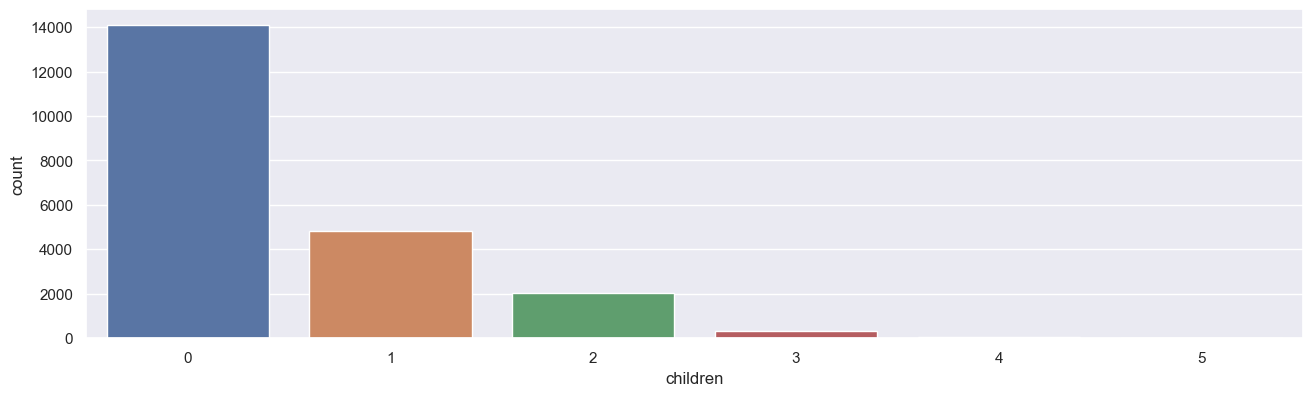

In [23]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15.7,4.27)})
sns.barplot(x=data_children_grouped.index, y = data_children_grouped['count'])


<AxesSubplot: xlabel='children', ylabel='repayment'>

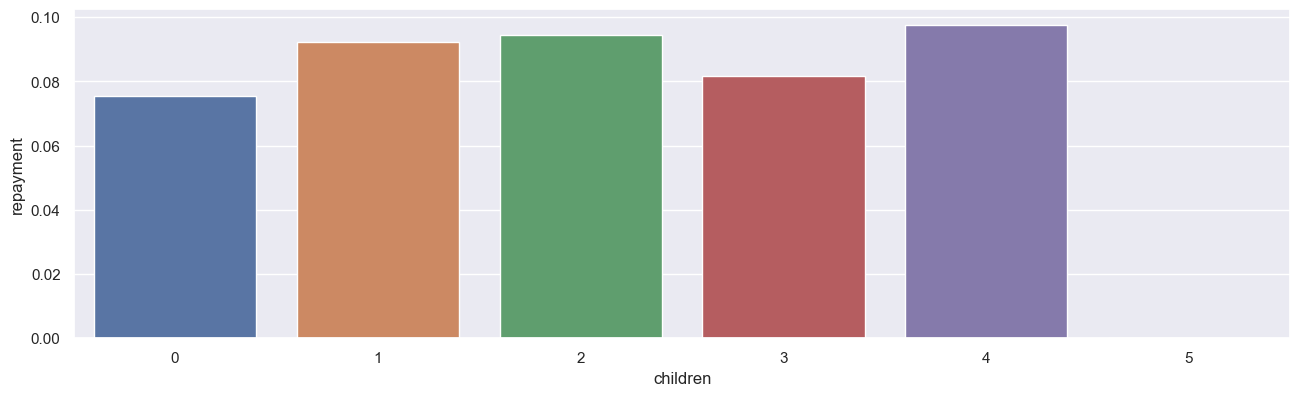

In [24]:
sns.barplot(x=data_children_grouped.index, y = data_children_grouped['repayment'])

**Вывод:** 
1. Сравнительно малое количество данных по заемщикам с 3 детьми и более в базе не дает возможности сделать однозначный вывод о вероятности возвращения кредита. Тем не менее отмечу, что случаев задолженности для группы 5 детей нет. Группы 3/4 ребенка имеют отклонения от среднего, но я бы отнес эти колебания к погрешности.
2. Среди основных групп 0-2 ребенка каждый дополнительный ребенок увеличивает вероятность образования задолженности. Соотвественно я бы снизил процент одобрения для 1 и 2 ребенка в модели.
3. После увеличения кол-ва информации по заемщикам с 3-5 детьми, я бы повторил анализ и принял бы решение, стоит ли накладывать дополнительный коэффициент на эти группы.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
data_family = data[['family_status','debt']] # Ваш код будет здесь. Вы можете создавать новые ячейки.
data_family_grouped = data_family.groupby('family_status')['debt'].agg(['sum','count'])
data_family_grouped['repayment'] = data_family_grouped['sum']/data_family_grouped['count']
data_family_grouped# Ваш код будет здесь. Вы можете создавать новые ячейки.

,sum,count,repayment
family_status,,,
Не женат / не замужем,273,2796,0.097639
в разводе,84,1189,0.070648
вдовец / вдова,63,951,0.066246
гражданский брак,385,4134,0.093130
женат / замужем,927,12261,0.075606


<AxesSubplot: xlabel='family_status', ylabel='sum'>

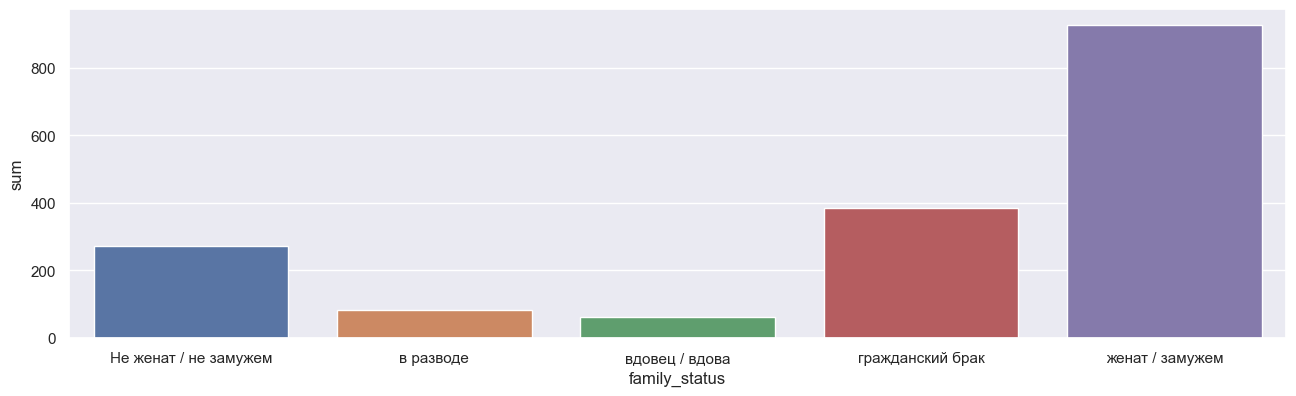

In [26]:
sns.barplot(x=data_family_grouped.index, y=data_family_grouped['sum'])

<AxesSubplot: xlabel='family_status', ylabel='repayment'>

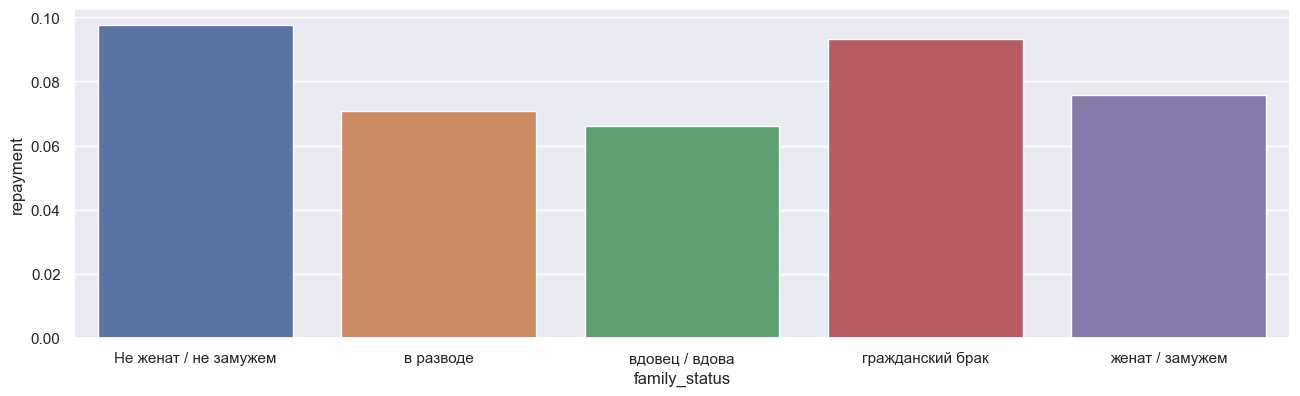

In [27]:
sns.barplot(x=data_family_grouped.index, y=data_family_grouped['repayment'])

**Вывод:** 
1. Заемщики, не состоящие в браке, а также живущие в гражданском браке чаще не выплачивают кредит вовремя. Можно связать это с тем, что семейный опыт повышает уровень ответственности граждан.
2. Также есть гипотеза о том, что часть заемщиков, которые не состоят в браке проживают с родителями, но на основании данного датасета установить это нельзя.
Я бы добавил понижающий коэффициент в модель скоринга для графждан, проживающих в гражданском браке и холостых.
3. Совокупно кол-во женатых сопоставимо с суммой заемщиков, проживающих в гражданском браке и холостых, что говорит о достаточной репрезентативности выборки.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [28]:
data_income_category= data[['total_income_category','debt']] # Ваш код будет здесь. Вы можете создавать новые ячейки.
data_income_category_grouped = data_income_category.groupby('total_income_category')['debt'].agg(['sum','count'])
data_income_category_grouped['repayment'] = data_income_category_grouped['sum']/data_income_category_grouped['count']
data_income_category_grouped

,sum,count,repayment
total_income_category,,,
A,2,25,0.080000
B,354,5014,0.070602
C,1353,15921,0.084982
D,21,349,0.060172
E,2,22,0.090909


<AxesSubplot: xlabel='total_income_category', ylabel='sum'>

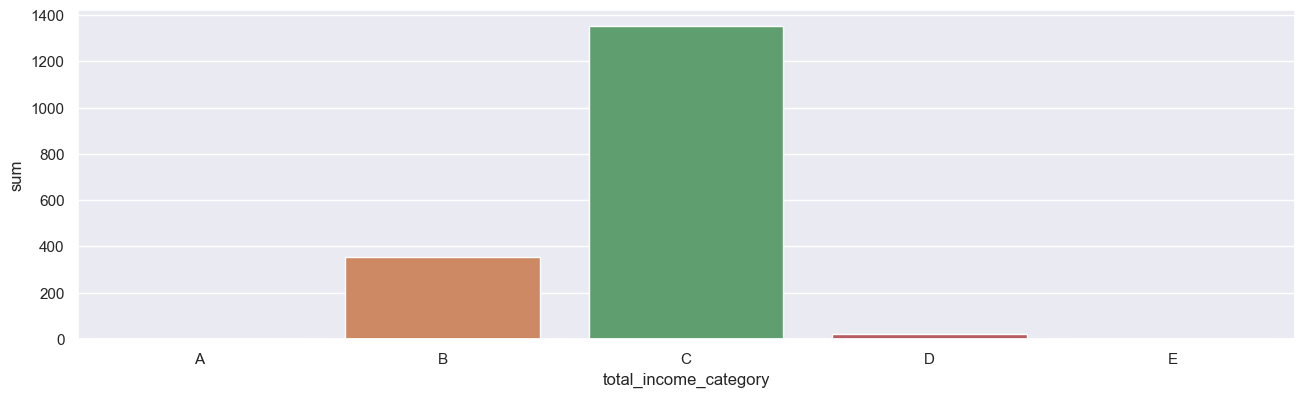

In [29]:
sns.barplot(x=data_income_category_grouped.index, y=data_income_category_grouped['sum'])

<AxesSubplot: xlabel='total_income_category', ylabel='repayment'>

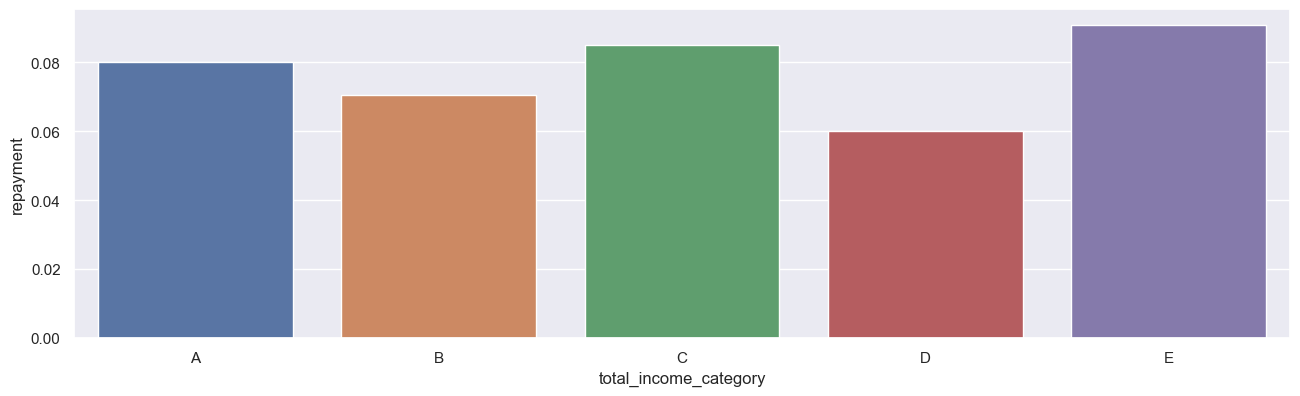

In [30]:
sns.barplot(x=data_income_category_grouped.index, y=data_income_category_grouped['repayment'])

**Вывод:** 
1. Почти все люди, берущие кредит находятся в категории С, доход которых находится в интервали от 50 до 200тыс. При текущей категоризации выводов сделать нельзя, т.к. заемщиков в группах А и Е почти нет, а B и C имеют очень широкий разбег.

In [45]:
#Оставим в базе только заемщиков групп B и C и сделаем новую сегментацию.
data_BC = data[(data['total_income_category']=='B')|(data['total_income_category']=='C')]
def categorize_income_BC(income):
    try:
        if 50000 <= income <= 100000:
            return '1. 50-100тыс'
        elif 100001 <= income <= 150000:
            return '2. 100-150тыс'
        elif 150001 <= income <= 200000:
            return '3. 150-200тыс'
        elif 200001 <= income <= 250000:
            return '4. 200-250тыс'
        elif income >= 250001:
            return '5. Более 250тыс'
    except:
        pass
data_BC['income_BC'] = data_BC['total_income'].apply(categorize_income_BC)
data_BC['income_BC'].value_counts() #Смотрим размеры новых групп

C:\Users\atropinskiy\AppData\Local\Temp\ipykernel_28328\1923038254.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_BC['income_BC'] = data_BC['total_income'].apply(categorize_income_BC)


2. 100-150тыс      7110
3. 150-200тыс      4738
1. 50-100тыс       4073
5. Более 250тыс    2772
4. 200-250тыс      2242
Name: income_BC, dtype: int64

In [46]:
data_BC = data_BC.groupby('income_BC')['debt'].agg(['sum','count'])
data_BC['repayment'] = data_BC['sum']/data_BC['count']
data_BC

,sum,count,repayment
income_BC,,,
1. 50-100тыс,331,4073,0.081267
2. 100-150тыс,619,7110,0.087060
3. 150-200тыс,403,4738,0.085057
4. 200-250тыс,162,2242,0.072257
5. Более 250тыс,192,2772,0.069264


<AxesSubplot: xlabel='income_BC', ylabel='repayment'>

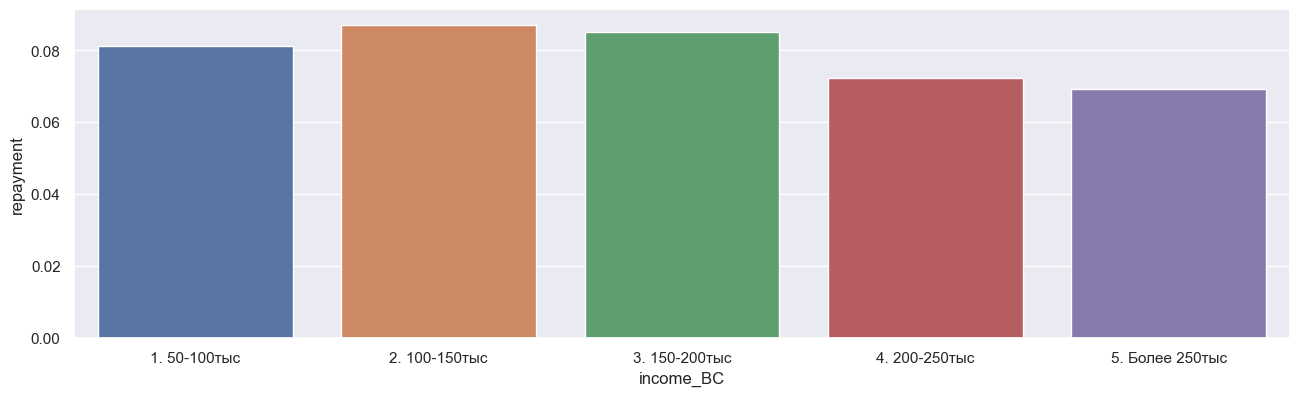

In [47]:

sns.barplot(x=data_BC.index, y = data_BC['repayment'])

**Вывод 2**
1. Мы видием тенденцию, что с ростом дохода на 50тыс есть небольшое снижение задолженности по кредиту.
2. Самые высокий риск - более 8,5% невозврата у людей с доходом 100-200 тыс руб.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [53]:
data_purpose = data[['purpose_category','debt']]
data_purpose_grouped = data_purpose.groupby('purpose_category')['debt'].agg(['sum','count'])
data_purpose_grouped['repayment']=data_purpose_grouped['sum'] / data_purpose_grouped['count']
data_purpose_grouped

,sum,count,repayment
purpose_category,,,
операции с автомобилем,400,4279,0.093480
операции с недвижимостью,780,10751,0.072551
получение образования,369,3988,0.092528
проведение свадьбы,183,2313,0.079118


<AxesSubplot: xlabel='purpose_category', ylabel='sum'>

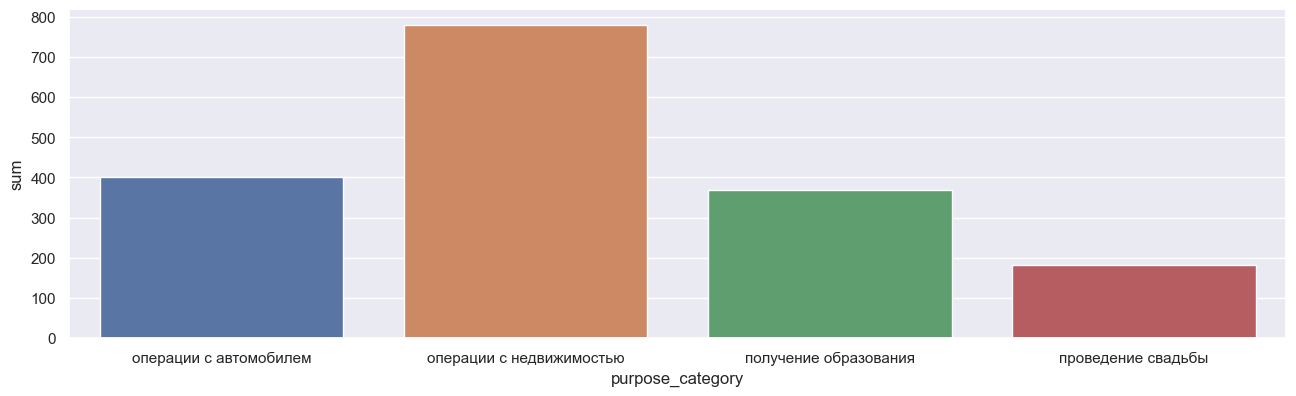

In [54]:
sns.barplot(x=data_purpose_grouped.index, y=data_purpose_grouped['sum'])

<AxesSubplot: xlabel='purpose_category', ylabel='repayment'>

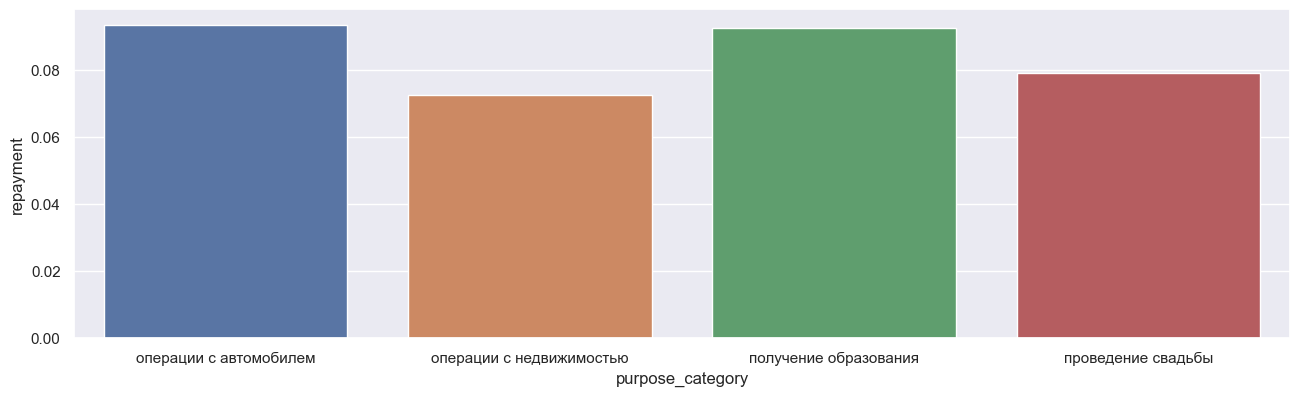

In [55]:
sns.barplot(x=data_purpose_grouped.index, y=data_purpose_grouped['repayment'])

**Вывод:** 
1. Люди, провдящие операции с недвижимостью и проведением свадьбы значительно реже образуют задолженность по кредиту.
2. Рискоориентированные категории - "операции с автомобилем" и "получение образования".
** я бы еще разделил людей повышающих образование на возрастные группы. Может оказаться, что основные генераторы задолженности находятся в одном возрастном сегменте.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 
1. Часть людей являются безработными, соответственно не указывают стаж и зарплату.
2. В ПО банка есть опция, позволяющая не указывать доход для людей, которых это смущает.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.


*Ответ:* 
1. Медиана лучше отсекает выпады. Один человек может сильно завысить/занизить средний доход группы.
2. Медиана более приближена к среднему доходу основной массы людей.

### Шаг 4: общий вывод.

1. В настоящий момент не хватает инструментов для полноценного анализа.
2. При достаточно большом количестве метрик ключевые выводы необходимо делать с помощью вспомогательных инструментов - таких как регрессия и бутстреп.
3. Делать выводы по одной метрике нельзя. Хороший пример с получением образования. По всей группе результат может быть высоким, но внутри этой группы может быть группа с очень низким процентом невозврата. Важно делать достаточное количество сегментаций, чтобы сделать однозначные выводы.
4. Нужны инструменты для проверки качества выборки, а также теория вероятности, поэтому с нетерпением жду следующих спринтов :)